## Implementing of the Simple Linear Regression with Ordinary Least Squares Method 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [3]:
data=make_regression(n_samples=1000,n_features=1)

In [4]:
X=data[0]
y=data[1]

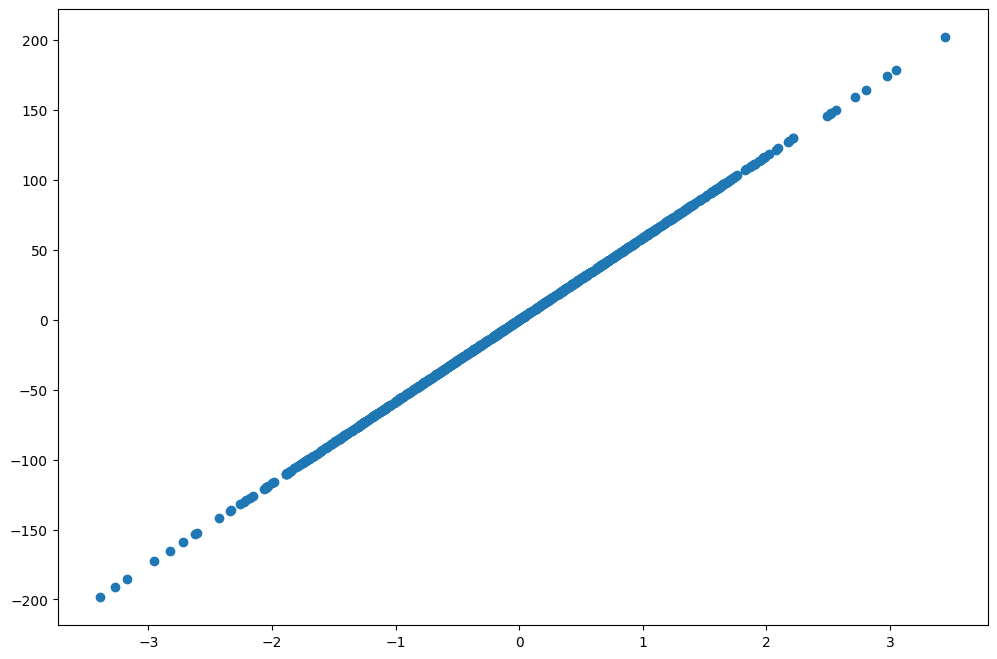

In [5]:
fig=plt.figure(figsize=(12,8))
fig=plt.scatter(X,y)

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [7]:
from PIL import Image

### Ordinary Least Squares Method 

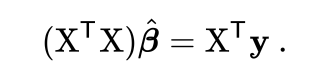

In [8]:
Image.open("Figures/ols.png")

According to the OLS method, both sides of the equation have to multiply with X.transpose(). The reason of the operation is finding weights. In this equation, weights equals to the beta_vector. 
beta_vector refers to beta values of the y=x_1*beta_1 + x_2*beta_2 ... +x_n*beta_n equation

* left : left side of the equation which is at the above 
* right : right side the of the equation which is at the above
* weights : intercept and coef in order 

* coeff / slope / gradient : second element of the weights 
* intercept : first element of the weights

* np.ones added at the ordinary_least_squares() method because wanted to create **vandermonde matrix** to find coef and intercept.
* np.ones added at the predict() methıd because wanted to use np.dot() for **coef * X + intercept relation**

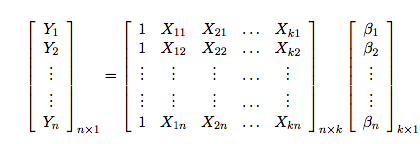

In [9]:
Image.open('Figures/ols_matrix.png')

In [10]:
class LinearRegression_mine():
    
    """
    Ordinary least squares Linear Regression.

    LinearRegression fits a linear model with coefficients w = (w1, …, wp) to 
    minimize the residual sum of squares between the observed targets in the dataset, 
    and the targets predicted by the linear approximation.

    Hyperparameters::
        
        fit_intercept: bool, default=True
        Whether to calculate the intercept for this model. 
        If set to False, no intercept will be used in calculations 
        (i.e. data is expected to be centered).

        positive: bool,default=False
        When set to True, forces the coefficients to be positive. 
        This option is only supported for dense arrays.
        
        weights : array, default=None
        
        To view weights 
        
    Attributes::
    
        coef_ : numpy array
 
        Coefficent of the linear fit.
        
        intercept : int 
        
        Intercept of the linear fit.
     """
    
    def __init__(self,fit_intercept=True,positive=False,weights=None):
        
        self.fit_intercept=fit_intercept
        self.positive=positive
        self.weights=weights
        self.coef_=None
        self.intercept_=None
        
    
    def ordinary_least_squares(self,X,y):
        
        X=np.c_[np.ones((X.shape[0],1)),X]
        left=np.dot(X.transpose(),X)
        right=np.dot(X.transpose(),y)
        weights=np.linalg.solve(left,right)
        
        if self.positive==True:
            
            return abs(weights)
        
        if self.fit_intercept!=True:
            
            weights[0]=0
            weights[1:]=weights[1:]
        
        self.intercept_=weights[0]
        self.coef_=weights[1:]
        
        return weights
    
    
    def fit(self,X,y):

        self.weights=self.ordinary_least_squares(X,y)
        
        
    def predict(self,X):
        
        X=np.c_[np.ones((X.shape[0],1)),X] 
        yhat=np.dot(X,self.weights).reshape(-1,1)
            
        return yhat
        
               

### Comparing Results with Sklearn.LinearRegression

#### Sklearn Results

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [12]:
model=LinearRegression(fit_intercept=True)

In [15]:
%time model.fit(X_train,y_train)

CPU times: user 722 µs, sys: 412 µs, total: 1.13 ms
Wall time: 883 µs


LinearRegression()

In [16]:
yhat_sklearn=model.predict(X_test)

In [17]:
r2_score(y_test,yhat_sklearn)

1.0

In [18]:
model.coef_,model.intercept_

(array([58.49257356]), -5.551115123125783e-16)

In [19]:
import seaborn as sns 

[Text(0.5, 0, 'Actual Test Values'), Text(0, 0.5, 'Predicted Values')]

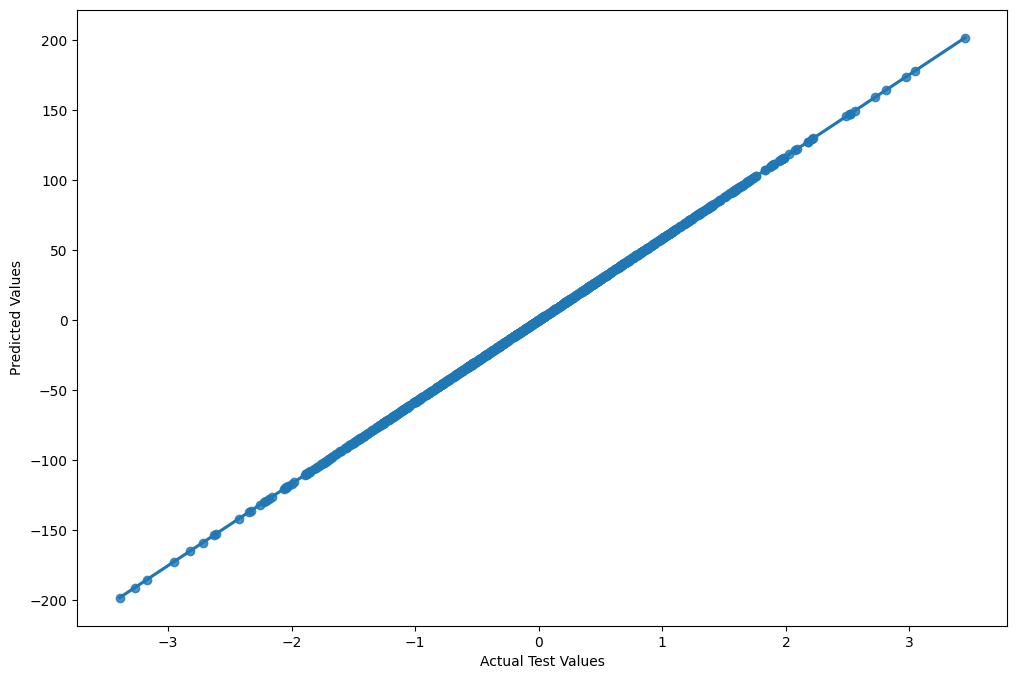

In [20]:
fig=plt.figure(figsize=(12,8))
fig=sns.regplot(x=X,y=y)
fig.set(xlabel='Actual Test Values', ylabel='Predicted Values')

#### Hand-made Results

In [21]:
model=LinearRegression_mine(fit_intercept=True)

In [22]:
%time model.fit(X_train,y_train)

CPU times: user 257 µs, sys: 102 µs, total: 359 µs
Wall time: 318 µs


In [23]:
yhat_mine=model.predict(X_test)

In [24]:
model.coef_,model.intercept_

(array([58.49257356]), -4.3326990827478936e-16)

In [25]:
r2_score(y_test,yhat_mine)

1.0

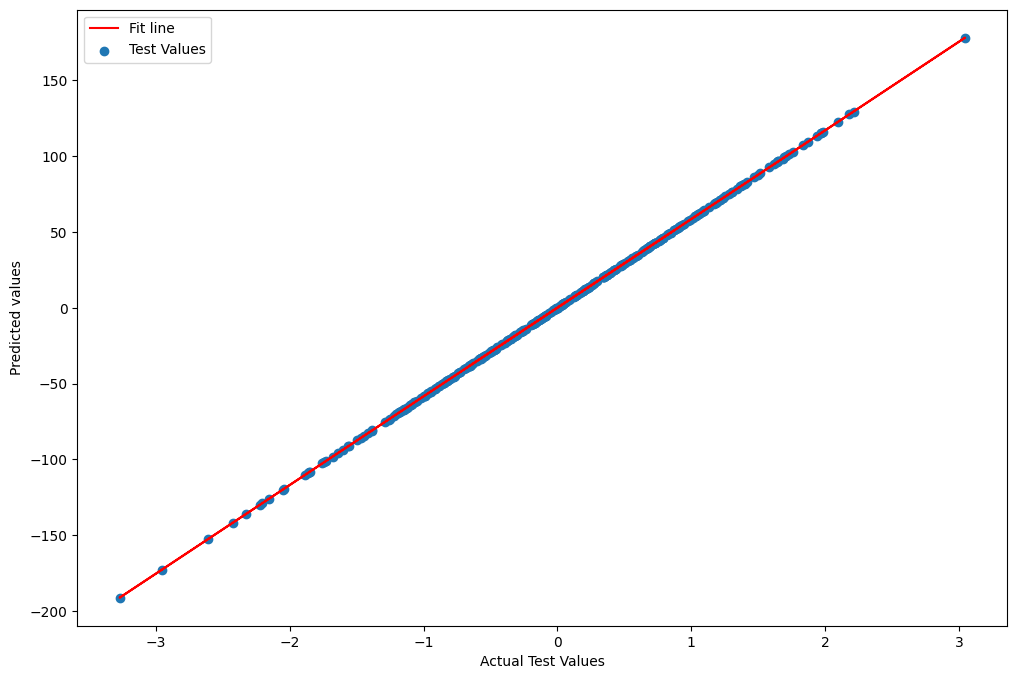

In [26]:
fig=plt.figure(figsize=(12,8))
plt.plot(X_test,yhat_mine,color='r',label='Fit line')
plt.scatter(X_test,y_test,label='Test Values')
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted values')
plt.legend()

### Gradient Descent Method 

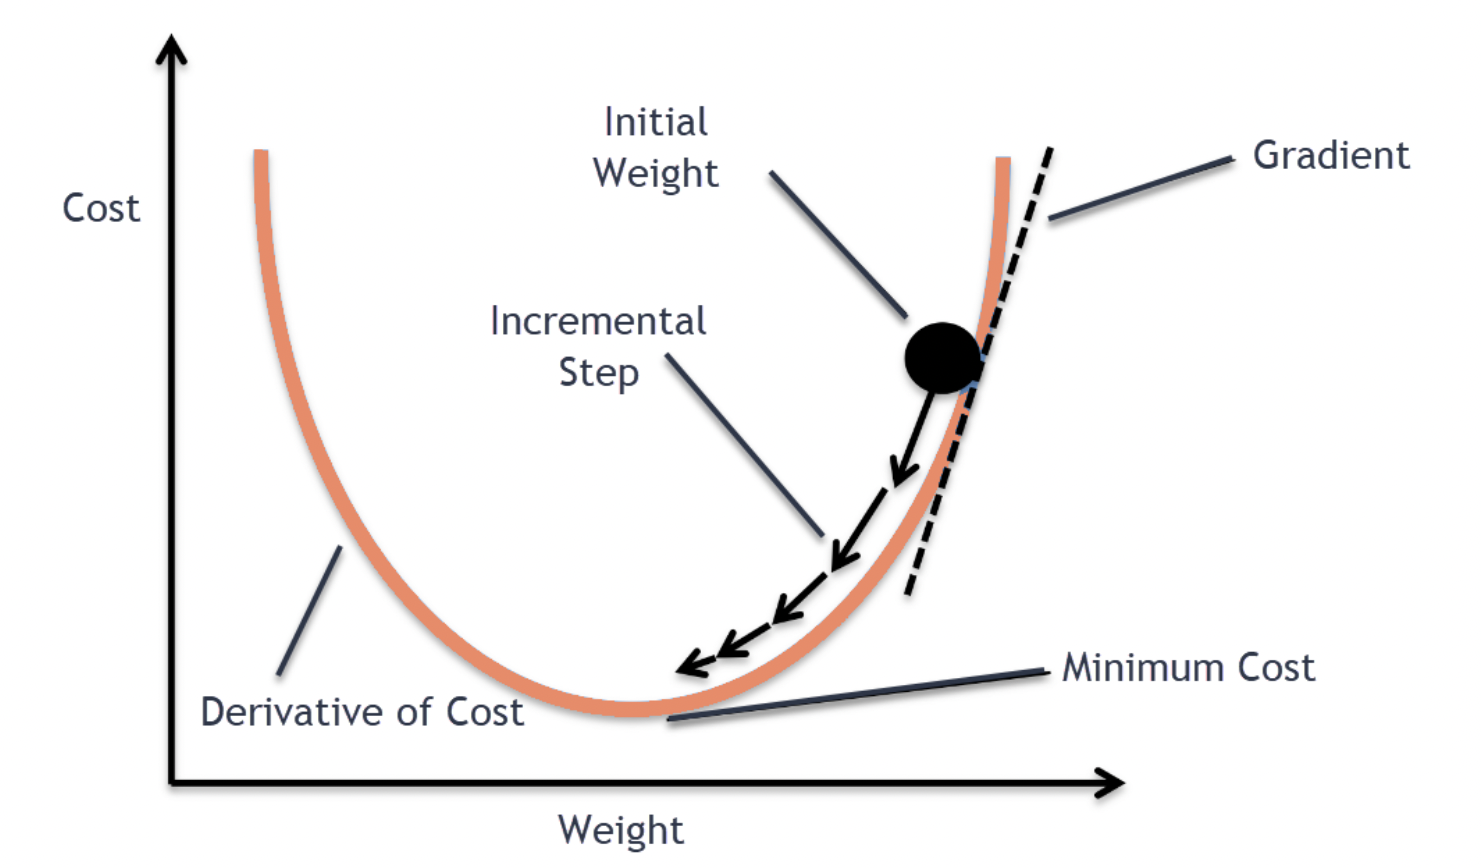

In [30]:
Image.open("Figures/gradientdescent.png")

In [31]:
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
lrate = 0.15
epochs =1000
n = X_train.size 

In [32]:
weights=np.random.rand(X_train_b.shape[1])
for _ in range(epochs):         
    
    yhat=np.dot(X_train_b,weights).reshape(-1,)
    D_b1_1 = (-2/n) * (X_train.ravel()* (y_train-yhat)).sum()
    D_b0 = (-2/n) * (y_train-yhat).sum() 
    weights[1:] -= (lrate * D_b1_1)
    weights[0] -= (lrate * D_b0 )
    

In [33]:
yhatt=np.dot(np.c_[np.ones((X_test.shape[0], 1)), X_test],weights)

In [34]:
r2_score(y_test,yhatt)

1.0

In [35]:
print('coef_:',weights[1],'intercept_:',weights[0])

coef_: 58.49257355604899 intercept_: -1.3076606791725362e-16


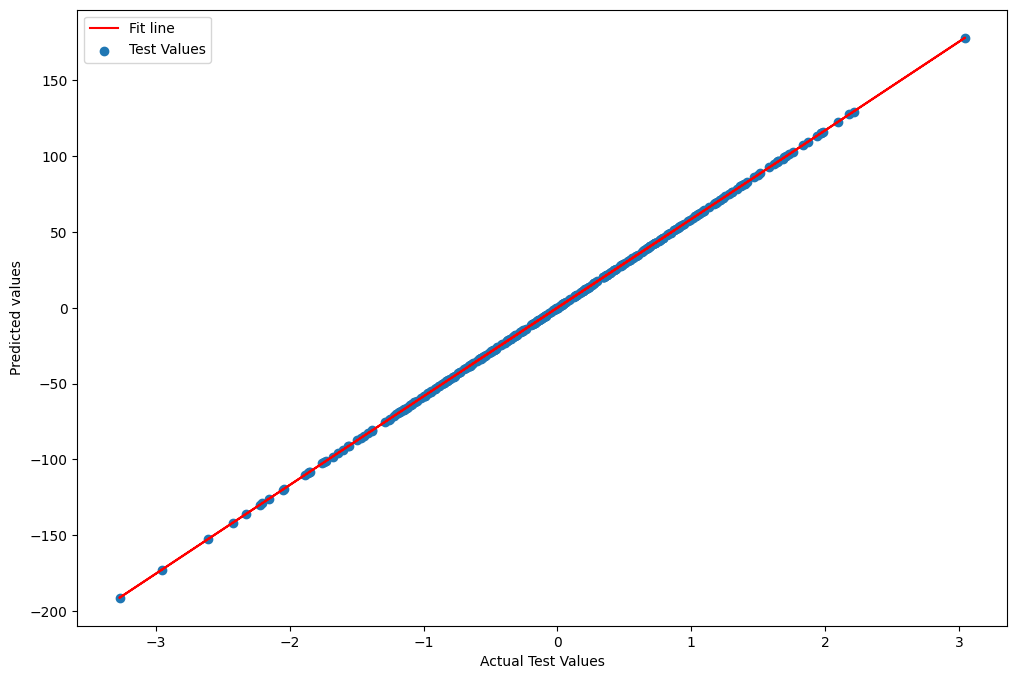

In [36]:
fig=plt.figure(figsize=(12,8))
plt.plot(X_test,np.dot(X_test_b,weights),color='r',label='Fit line')
plt.scatter(X_test,y_test,label='Test Values')
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted values')
plt.legend()